# Сборный проект - 1

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

> Данные за 2016 год могут быть неполными.


## Ознакомление с датасетом

Добавляем нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import plotly.express as px
import numpy as np
from datetime import datetime, date, time
from scipy import stats as st


pd.options.mode.chained_assignment = None
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
matplotlib_axes_logger.setLevel('ERROR')

Считываем файл

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Посмотрим на типы данных, размер датафрейма и колонки, а так же сам датафрейм

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Выводы

 - Требуется переименовать колонки,привести их к нижнему регистру;
 - Данные в колонках 'Name','Platform','Genre' привести так же к нижнему регистру;
 - Изменить тип данных и вид в колонке 'Year_of_Release';
 - Посмотреть и решить, что делать с пропусками в остальных колонках. 

## Предобработка данных

Для начала переименуем столбцы, изменив регистр на нижний.

In [7]:
games.columns = games.columns.str.lower()

Данные в колонках *'name', 'platform', 'genre'* приведём так же к нижнему регистру

In [8]:
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()

In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Названия игр

Посмотрим,есть ли пропуски в колонке *'name'*

In [10]:
games[games.name.isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Их всего два,при этом большая часть значений пропущена. Их мы удалим.

In [11]:
games = games.drop(games.index[[659,14244]]).reset_index()

### Даты выхода игр

Год выпуска в целом необязательно переводить в формат даты,поскольку представлен только год - т.е единичное число. Переведем в **Int16**

In [12]:
games1 = games[games.year_of_release.isna() == True]
games1.head(20)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,719,call of duty 3,wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Hе вижу резонной замены для пропусков в датах. В функции используя название (например FIFA soccer 2014 ) это сделать будет нереально,т.к. имеются несовпадения дат в названии и дат выхода, так же встречаются названия типа "2049" в названиях , что делает такой метод замены крайне неточным. Процент пропусков в этих данных составляет всего 0.6%. Проще отбросить эти данные.

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games = games.query('year_of_release > 0')

Так же поменяем тип данных и избавимся от нулей в годах выпуска.

In [14]:
games.year_of_release = games.year_of_release.astype('Int16')
games.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
games = games.sort_values(by=['year_of_release'],ascending = False)

### Жанры игр

Посмотрим колонку *'genre'*

In [16]:
games.genre.unique()

array(['simulation', 'role-playing', 'adventure', 'action', 'misc',
       'sports', 'strategy', 'shooter', 'racing', 'fighting', 'puzzle',
       'platform'], dtype=object)

В данном столбце пропусков нет, отлично.

### Продажи по регионам

Далeе столбцы *'na_sales','eu_sales','jp_sales','other_sales'*

In [17]:
display(games[games['na_sales'].isna()==True]['na_sales'].count())

display(games[games['eu_sales'].isna()==True]['eu_sales'].count())

display(games[games['jp_sales'].isna()==True]['jp_sales'].count())

display(games[games['other_sales'].isna()==True]['other_sales'].count())

0

0

0

0

Пропусков в данных столбцах так же нет, посчитаем суммарную прибыль в отдельный столбец.

In [18]:
games['total_sales'] = (games.na_sales+
                       games.eu_sales+
                       games.jp_sales+
                       games.other_sales)

Избавимся от лишней колонки с индексами

In [19]:
games = games.reset_index()
games = games.drop(labels = ['level_0','index'],axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,NaN,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72.0,8,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87.0,8.6,NaN,0.39
4,dynasty warriors: eiketsuden,psv,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Оценки игр

Сразу видно, что в этих данных много пропусков.Они могут быть по нескольким причинам:
- Свежая игра, слишком мало рецензий и отзывов;
- Игра вышла не слишком популярной, из-за этого нет отзывов;

Оценим количество пропусков в данных колонках.

In [20]:
critics = games[games['critic_score'].isna()==True]['name'].count()
display(f'Отсутствующих оценок критиков: {critics} ')
users = games[games['user_score'].isna()==True]['name'].count()
display(f'Отсутствующих оценок пользователей: {users}')
# Суммарно
users+critics

'Отсутствующих оценок критиков: 8461 '

'Отсутствующих оценок пользователей: 6605'

15066

> 15066 - б**о**льшая часть значений оценок пропущена. Заменять их медианами или средним по какой-либо группе **нельзя**, т.к. это даст очень высокие погрешности. Нулями или выбивающимися значениями заменять тоже не стоит, т.к. это будет в любом случае влиять на распределение. Лучше всего оставить данные, как есть.

 Стоит так же посмотреть уникальные значения на предмет каких-либо ещё нюансов.

In [21]:
games.critic_score.unique()

array([nan, 72., 87., 64., 85., 78., 84., 79., 53., 69., 76., 75., 88.,
       71., 83., 66., 55., 80., 77., 81., 73., 86., 70., 54., 63., 74.,
       35., 51., 68., 61., 60., 82., 48., 42., 52., 43., 67., 91., 56.,
       90., 89., 49., 46., 65., 62., 31., 57., 59., 93., 44., 45., 25.,
       95., 39., 19., 96., 58., 32., 20., 92., 97., 50., 47., 26., 36.,
       40., 33., 23., 38., 94., 34., 13., 37., 24., 21., 41., 28., 17.,
       27., 30., 29., 98.])

In [22]:
games.critic_score.value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
17.0      1
21.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

Поменяем тип данных в столбце для простоты

In [23]:
games.critic_score = games.critic_score.astype('Int16')

>Отдельно посмотрим колонку с рейтингом пользователей

In [24]:
games.user_score.unique()

array([nan, '8', '8.6', '6.8', 'tbd', '8.3', '5.5', '5.8', '6.3', '8.7',
       '6', '4.3', '7.6', '8.1', '7.4', '8.5', '7.1', '7', '1.7', '6.6',
       '6.9', '7.7', '6.1', '3.1', '7.8', '1.6', '3.5', '6.5', '4.8',
       '2.9', '7.5', '8.2', '5.2', '7.9', '6.7', '3.8', '4.7', '5.1',
       '2.3', '4.9', '7.3', '3.4', '5.7', '2.4', '5.6', '4.2', '5.9',
       '8.4', '6.2', '3.7', '2', '6.4', '8.8', '4.5', '4.6', '3.3', '7.2',
       '0.7', '4.4', '3.2', '0.2', '5', '4.1', '3', '4', '8.9', '1.9',
       '5.3', '9.3', '2.1', '9.2', '5.4', '2.5', '1.5', '3.6', '2.8',
       '1.4', '9', '9.1', '3.9', '2.7', '2.6', '2.2', '1.3', '1', '1.8',
       '0.9', '1.2', '0.5', '0', '0.6', '1.1', '0.3', '9.5', '9.7', '9.4',
       '9.6'], dtype=object)

- Отсутствующие значения мы уже видели, их решили оставить;
- Интересное сокращение *'tbd'*,посмотрим дальше, как часто встречается;
- Ретинг 0 - посмотрим частоту встречаемости и не ошибка ли это;

In [25]:
games.loc[games['user_score'] == 'tbd'].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10,call of duty: modern warfare trilogy,x360,2016,shooter,0.02,0.02,0.00,0.00,NaN,tbd,M,0.04
49,just dance 2017,ps4,2016,misc,0.02,0.00,0.00,0.01,73,tbd,E10+,0.03
51,lumo,psv,2016,puzzle,0.00,0.01,0.00,0.00,NaN,tbd,E10+,0.01
73,just dance 2017,x360,2016,misc,0.02,0.02,0.00,0.00,NaN,tbd,E10+,0.04
86,blazblue central fiction,ps3,2016,fighting,0.02,0.02,0.02,0.01,NaN,tbd,T,0.07
144,just dance 2017,ps3,2016,misc,0.01,0.03,0.00,0.01,NaN,tbd,E10+,0.05
158,cartoon network battle crashers,3ds,2016,action,0.01,0.00,0.00,0.00,NaN,tbd,E10+,0.01
177,rocksmith 2014 edition remastered,xone,2016,misc,0.01,0.00,0.00,0.00,NaN,tbd,T,0.01
199,atari flashback classics: volume 1,xone,2016,misc,0.02,0.00,0.00,0.00,NaN,tbd,E,0.02
202,atari flashback classics: volume 2,xone,2016,misc,0.02,0.00,0.00,0.00,NaN,tbd,E,0.02


In [26]:
games.user_score.value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.7       2
1.9       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Видим, что значение рейтинга - 0, всего у одной игры.
> Так же,что значений ['tbd'](https://en.wikipedia.org/wiki/TBD_(disambiguation)) довольно много. Поскольку фактической информации такая запись не несет,а корреляция у данной колонки с лучшем случае средняя с колонкой оценок критиков,лучше будет заменить за Nan,что не будет сказываться на виауализации и расчётах распределений

In [27]:
games['user_score'] = games['user_score'].replace('tbd',np.nan)


Так же изначально эта колонка имеет тип *object*, поменяем его на *float32*.

In [28]:
games['user_score'] =  pd.to_numeric(games['user_score'], downcast='float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int16
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int16
user_score         7463 non-null float32
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: Int16(2), float32(1), float64(5), object(4)
memory usage: 1.3+ MB


In [29]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,NaN,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,8.0,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,8.6,NaN,0.39
4,dynasty warriors: eiketsuden,psv,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [30]:
corr = games.corr()
corr.style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.0923264,0.00404478,-0.168477,0.0378211,0.011411,-0.267851,-0.0762203
na_sales,-0.0923264,1,0.766546,0.451162,0.638479,0.240083,0.0855492,0.941241
eu_sales,0.00404478,0.766546,1,0.435894,0.722679,0.221276,0.0555299,0.901673
jp_sales,-0.168477,0.451162,0.435894,1,0.291562,0.153474,0.126372,0.613305
other_sales,0.0378211,0.638479,0.722679,0.291562,1,0.19841,0.056935,0.74893
critic_score,0.011411,0.240083,0.221276,0.153474,0.19841,1,0.579671,0.245349
user_score,-0.267851,0.0855492,0.0555299,0.126372,0.056935,0.579671,1,0.087984
total_sales,-0.0762203,0.941241,0.901673,0.613305,0.74893,0.245349,0.087984,1


### Возрастной рейтинг

In [31]:
games.rating.unique()

array([nan, 'M', 'E', 'T', 'E10+', 'RP', 'EC', 'AO', 'K-A'], dtype=object)

Согласно [источнику](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#:~:text=%C2%ABEC%C2%BB%20(%C2%ABEarly%20childhood,%D0%BE%D0%B1%D1%8B%D1%87%D0%BD%D0%BE%20%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D1%8F%D1%8E%D1%82%20%D1%81%D0%BE%D0%B1%D0%BE%D0%B9%20%D1%80%D0%B0%D0%B7%D0%B2%D0%B8%D0%B2%D0%B0%D1%8E%D1%89%D0%B8%D0%B5%20%D0%B8%D0%B3%D1%80%D1%8B):
- **«EC» («Early childhood»)** — *«Для детей младшего возраста*»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone»;


- **«E» («Everyone»)** — *«Для всех»*: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. **Первоначально "K-A" ("Kids to Adults")**;


- **«E10+» («Everyone 10 and older»)** — *«Для всех от 10 лет и старше»*: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat;


- **«T» («Teen»)** — *«Подросткам»*: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;


- **«M» («Mature»)** — *«Для взрослых»*: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;


- **«AO» («Adults Only 18+»)** — *«Только для взрослых»*: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году;


- **«RP» («Rating Pending»)** — *«Рейтинг ожидается»*: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [32]:
games[games['rating'].isna() == True]['name'].count()

6676

In [33]:
games[games['rating'].isna() == True].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,NaN,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,8.6,NaN,0.39
4,dynasty warriors: eiketsuden,psv,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
5,bullet girls 2,psv,2016,action,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
6,nobunaga's ambition: sphere of influence - sen...,psv,2016,misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
9,stellaris,pc,2016,strategy,0.00,0.04,0.00,0.00,78,8.0,NaN,0.04
11,zettai kaikyuu gakuen: eden with roses and pha...,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16,haikyu!! cross team match!,3ds,2016,adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
20,f1 2016 (codemasters),ps4,2016,racing,0.03,0.29,0.01,0.05,NaN,NaN,NaN,0.38


> **ESRB** - это рейтинговая система, которая имеет юр.силу только в США, Канаде и Мексике, для остальных регионов используется своя собственная система.
Если посмотреть на пропуски и связать с продажи по регионам, то можно заметить, что у нас есть игры, которые выпускались исключительно для внутреннего рынка, где эта система оценки рейтинга не действует. Например: **haikyu!! cross team match!**, **refrain no chika meikyuu to majo no ryodan**, **doraemon: shin nobita no nihon tanjou**,выходившие по-видимому только для внутреннего рынка Японии и не продававшиеся за рубежом,а потому не имеющие оценки по ситеме ESRB,так как продажи нулевые во всех регионах, кроме Японии. Мы не можем без дополнительной выгрузки адекватно заполнить данные пропуски и их слишком много, чтобы просто-напросто отбрасывать.

Заменим на строковую константу для выделения этой группы.

In [34]:
games.rating = games.rating.replace(np.nan,'N/A')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,N/A,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,8.0,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,8.6,N/A,0.39
4,dynasty warriors: eiketsuden,psv,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01


### Выводы

- Привел столбцы к строчному регистру;
- Привел данные в столбцах *'name', 'platform', 'genre'* к строчному регистру;
- Отсортировал данные по году выхода игр;
- Добавил колонку с суммарной выручкой по всем регионам;
- Удалил две пропущенных строки с отсутствующими практически полностью данными;
- Отфильтровал данные с пропусками в колонке даты выхода;
- Пропуски в оценке игр пользователями и критиками оставил как есть;
- Заменил отсутствующие значения в колонке с возрастным рейтингом игры на текстовую константу.

## Исследовательский анализ данных

### Количество игр в год, средний срок жизни платформы

Стоит посмотреть, сколько игр выпускалось в разные годы и важны ли данные за все периоды или нет.

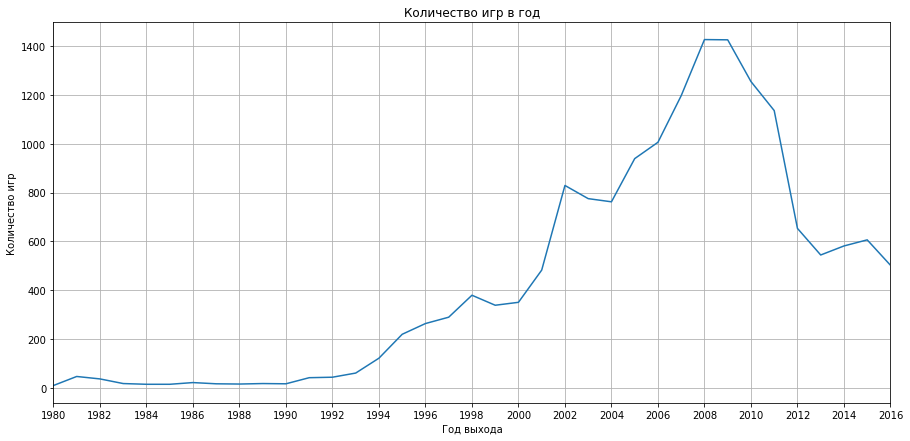

In [35]:
ax = games.pivot_table(index = 'year_of_release',
                       values='name',
                       aggfunc='count').plot(kind='line',
                                             grid=True,
                                             figsize = (15,7),
                                             title = 'Количество игр в год',
                                             legend = False)
ax.set_xlabel('Год выхода')
ax.set_ylabel('Количество игр')
ax.set_xticks(np.arange(1980, 2017, 2));

Как мы видим, пик выпуска игр приходится на **2006-2010** года. Однако важным фактором для будущего прогнозирования возможной популярности и спроса на какой-либо жанр будет **время жизни консоли или устройства**. В таком случае для нас может оказаться не важным факт выхода 2D-платформера из далекого **1981** года. Посмотрим срезами, какие консоли и устройства занимают большую часть продаж на пике и ближе к прогнозируемым датам.

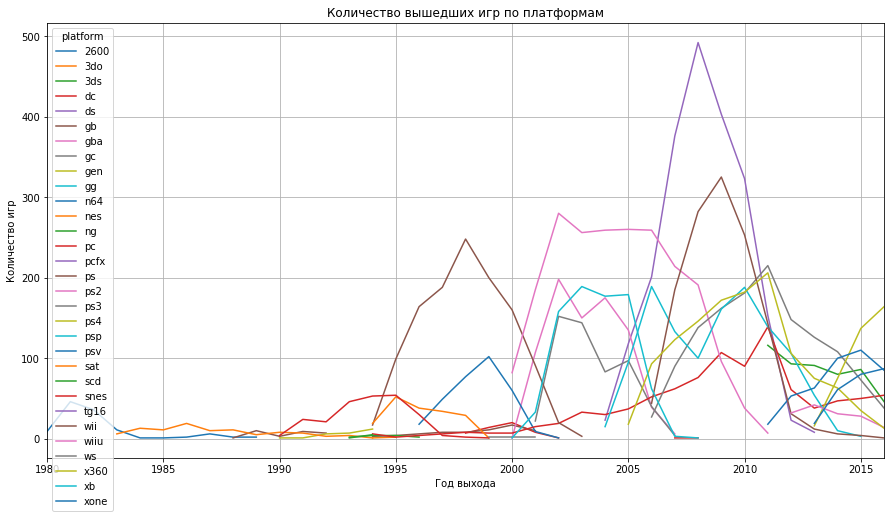

In [36]:
pivot_platform = games.pivot_table(index= 'year_of_release',
                                   columns='platform',
                                   values='name',
                                   aggfunc='count').plot(kind = 'line',
                                                         grid = True,
                                                         title = 'Количество вышедших игр по платформам',
                                                         figsize = (15,8))
pivot_platform.set_xlabel('Год выхода')
pivot_platform.set_ylabel('Количество игр');


Как мы видим, средний срок каждой консоли в районе **8-10** лет:
- Игры на PS1 выпускались с **1994 по 2003**, пик пришёлся на **1998** год;
- Игры на PS2 выпускались с **2000 по 2011**, пик пришёлся на **2003** год;
- Игры на PS3 выпускались с **2006 по 2016 и далее**, пик пришёлся на **2011** год;
- Игры на PS4 выпускались с **2013 по 2016 и далее**, пика тут уже не видно;

Наблюдается подобная цикличность и в других серийный и несерийных продуктах. С развитием новых более мощных технологий морально устаревшие уходят на задний план,их продажи падают, а игр выпускается всё меньше.Они теряют актуальность.

*Как пример можно рассмотреть платформу **ds**, пик которой самый высокий и приходится на 2008 год. Однако она абсолютна не акутальна в 2016 году. Уже в 2013 вышло всего 8 игр на данной платформе.*

>Это справедливо для всех платформ,**за исключением PC**, пик которой приходился на **2010 год**, из-за возможности обновления его отдельных компонентов она остается коттируемой и акутальной и сейчас.
Для прогнозирования *успешности игр*, стоит обязательно учитывать платформу, на которой будет эта игра выпущена. Так как у каждой из систем есть свой временной ресурс и ограничение возможностей (опять же, ПК в расчёт мы пока не берем).


Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним,таким образом какой характерный срок появляются новые и исчезают старые платформы.


In [37]:
games_pivot = games.pivot_table(index= 'platform',
                                values= 'total_sales').sort_values(by ='total_sales',
                                                                   ascending = False ).head(15).reset_index(drop= False)
games_pivot

,platform,total_sales
0,gb,2.622990
1,nes,2.561735
2,gen,1.050000
3,snes,0.836987
4,ps4,0.801378
5,x360,0.780227
6,2600,0.745517
7,ps3,0.713124
8,wii,0.692986
9,n64,0.689905


Таким образом мы выяснили ТОП-15 плаформ по суммарным продажам за всё время, теперь распределение.

In [38]:
list_of_top = games_pivot['platform'].head(15).to_list()
list_of_top

['gb',
 'nes',
 'gen',
 'snes',
 'ps4',
 'x360',
 '2600',
 'ps3',
 'wii',
 'n64',
 'xone',
 'ps',
 'ps2',
 'wiiu',
 '3ds']

In [39]:
platform_years = games.loc[games['platform'].isin(list_of_top)]
platform_years.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,N/A,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,8.0,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,8.6,N/A,0.39
7,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64,6.8,E,0.05
8,life is strange,ps4,2016,adventure,0.15,0.15,0.03,0.06,85,8.6,M,0.39
10,call of duty: modern warfare trilogy,x360,2016,shooter,0.02,0.02,0.00,0.00,NaN,NaN,M,0.04
12,psycho-pass: mandatory happiness,ps4,2016,adventure,0.03,0.00,0.00,0.01,72,8.3,T,0.04
13,fifa 17,xone,2016,sports,0.43,2.05,0.00,0.17,84,5.5,E,2.65
15,goat simulator,xone,2016,simulation,0.00,0.01,0.00,0.00,53,6.3,T,0.01
16,haikyu!! cross team match!,3ds,2016,adventure,0.00,0.00,0.04,0.00,NaN,NaN,N/A,0.04


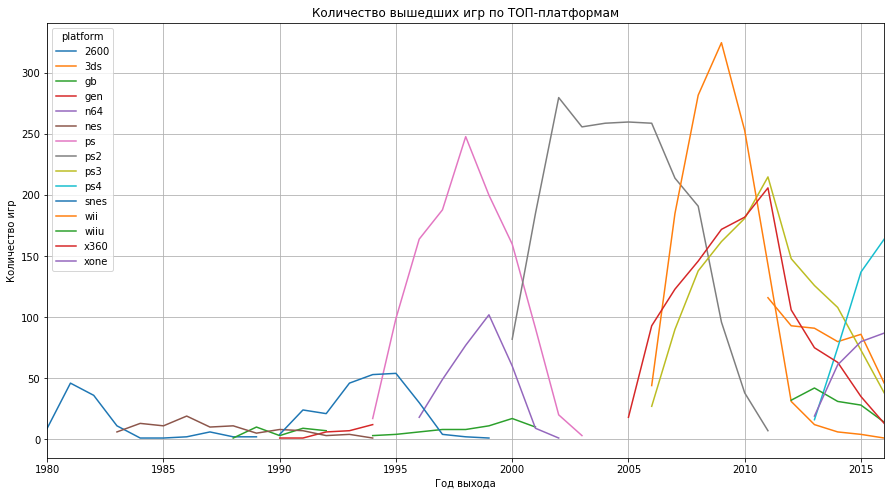

In [40]:
platform_years_pivot = platform_years.pivot_table(index= 'year_of_release',
                                                  columns='platform',
                                                  values='name',
                                                  aggfunc='count').plot(kind = 'line',
                                                         grid = True,
                                                         title = 'Количество вышедших игр по ТОП-платформам',
                                                         figsize = (15,8))
platform_years_pivot.set_xlabel('Год выхода')
platform_years_pivot.set_ylabel('Количество игр');

Как мы видим, не все консоли в топе продаж сейчас имеют такую же актуальность, как и в середине своей жизни на пике продаж.
- Таким образом, можно не брать в рассчёт все платформы, как минимум до **2005** года, поскольку сейчас выручки они уже не приносят;
- Видим, что многие платформы берут свое начало в **2011** году, в то время как у других чуть более ранних ещё не закончился их жизненный цикл.

Я предлагаю взять для начала анализа **2011 год**,т.к. именно в этот год приходится старт основных платформ, которые будут акутальны и в 2017, согласно средней жизни платформы. Для более далеких прогнозирований модель будет сохраняться такой же - берется интервал в **5-7** лет до даты выхода в свет.
> Если игровая платформа находится на рынке около 5 лет и\или находится в пике продаж,можно рассчитывать, что у неё "в запасе" есть ещё в районе 3-5 лет в среднем.

In [41]:
games_f = platform_years.loc[platform_years['year_of_release'] >= 2011]

In [42]:
games_f.year_of_release.unique()

<IntegerArray>
[2016, 2015, 2014, 2013, 2012, 2011]
Length: 6, dtype: Int16

#### Выводы

- Для прогнозирования данные за весь период не нужны;
- Стоит брать максимальный срок анализа в **5 предыдущих лет**, лучше - **2-3 года**,так как на многих платформах слуается спад именно за этот период времени;
- Обязательно знать актуальность платформы для выпуска игры.

### "Ящики с усами"

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

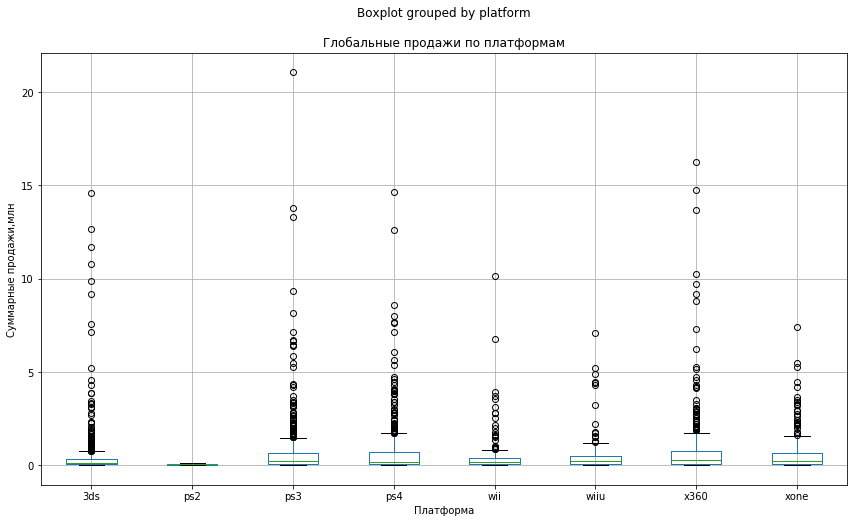

In [43]:
games_f.boxplot(column='total_sales', by='platform',figsize=(14, 8))
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи,млн')
plt.title('Глобальные продажи по платформам');

> В данных есть выбросы с крайне высокими значениями относительно других - это нормально. Фактически, это игры, которые были крайне успешными на платформе. Таких мало, но учитывая, что по факту именно они - основная продающая сила, исключить мы их не можем, т.к. остальные игры в районе 0 - это игры убыточные для студий, которым нужно платить зарплаты разработчикам, тратить деньги на рекламу и распостранение.

Так как PS2 уже неактуальна, уберем её из сравнения.

In [44]:
games_f = games_f.query('platform != "ps2"')

#### Выводы

- Лучше всего ситуация на рынке у платформ **3DS, PS3, X360 и PS4**,что схоже с реальной статистикой. Большая часть игр как раз выпускается на данных платформах, они пользуются спросом у игроков по всему миру и на них чаще встречаются эксклюзивы и ААА тайтлы, создающие львиную долю всей выручки;
- Чуть похуже дела обстоят у платформ **Xbox One, Wii\Wiiu**. Это тоже вполне объяснимо, так как игры на ПК стоят дешевле игр на приставки (в России так уж точно), а так же **Xbox One** имеет по сути обратную совместимость с ПК, из-за чего хоть продажи на **Xbox One** и выше,чем на **PC**, но в целом они являются условными конкурентами аудитории;
- Самые низкие продажи приходятся на платформы **PS2**. Это связано с тем, что ей на смену уже пришло два новых поколения консолей и срок жизни **PS2** закончился;
- **Самые потенциально прибыльные платформы - PS4 и XBox One**, их продажи растут, это единственные консоли,которые не дошли ещё даже до пика продаж, которые  показывают наибольший рост.

### Диаграммы рассеяния и корелляция отзывы\продажи

In [45]:
games_f.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,N/A,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,8.0,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,8.6,N/A,0.39
7,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64,6.8,E,0.05
8,life is strange,ps4,2016,adventure,0.15,0.15,0.03,0.06,85,8.6,M,0.39


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

> Однако для начала приведем оценки пользователей и критиков к единому интервалу для удоства отображения и уточнения корреляции между ними,т.к. не играет особой роли, как мы исчисляем отзывы, в 100-бальной системе или 10-бальной. Главное, чтобы они согласовались между собой.

In [46]:
games_f['user_score'] = (games_f['user_score']*10).astype('Int16')
games_f.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,N/A,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,80,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,86,N/A,0.39
7,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64,68,E,0.05
8,life is strange,ps4,2016,adventure,0.15,0.15,0.03,0.06,85,86,M,0.39


Построим общие диаграммы рассеяния по всем платформам по продажам от пользовательского ретийнга и рейтинга критиков.

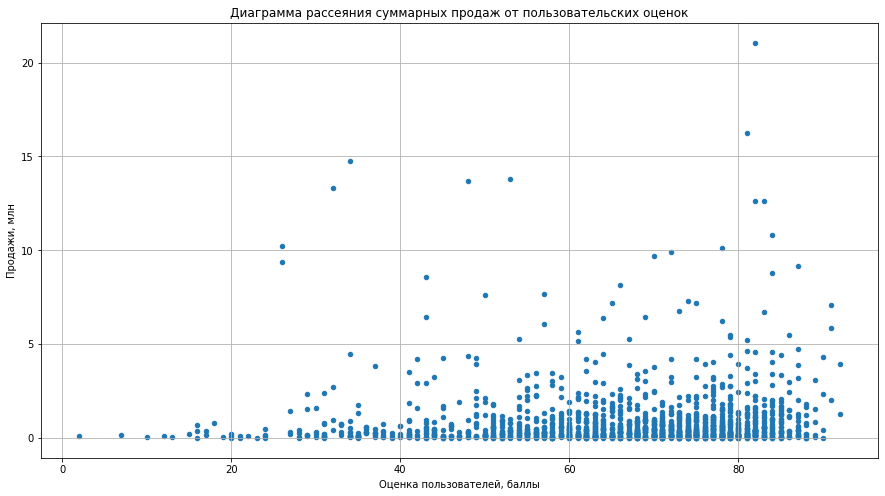

In [47]:
user_scatter = games_f.plot(kind = 'scatter',
                            x = 'user_score',
                            y = 'total_sales',
                            grid = True,
                            title = 'Диаграмма рассеяния суммарных продаж от пользовательских оценок',
                            figsize = (15,8))
user_scatter.set_xlabel('Оценка пользователей, баллы')
user_scatter.set_ylabel('Продажи, млн');

Мы видим закономерную картину, *чем выше оценка пользователей, тем больше продаж происходит*. 
- **До 60 баллов** - идёт постепенное увеличение продаж. 
- На уровне **от 60 и выше** - больше выглядит как колебания, рост есть, но незначительный и продажи находятся примерно в одном диапазоне, не считая увеличившегося количества игр, которые "выстреливают" и привносят либо какое-то ноу-хау в жанре, либо становятся более популярными у пользователей по причине разрекламированности, хорошей графики, интересного сюжета,сеттинга или игрового процесса. Эдакие законодатели моды в сфере игр.

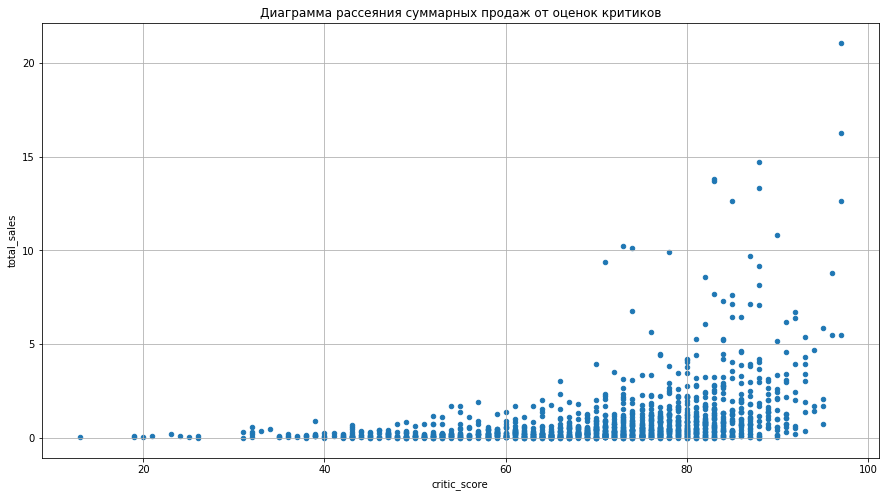

In [48]:
critic_scatter = games_f.plot(kind = 'scatter',
                            x = 'critic_score',
                            y = 'total_sales',
                            grid = True,
                            title = 'Диаграмма рассеяния суммарных продаж от оценок критиков',
                            figsize = (15,8))
user_scatter.set_xlabel('Оценка критиков, баллы')
user_scatter.set_ylabel('Продажи, млн');

В целом картина похожа на диаграмму рассеивания от оценок пользователей - чем выше оценка критиков, тем выше продажи.
*Однако есть некоторые отличия*:
- Во-первых, как мы видим, оценка критиков **оказывает существенно более ощутимое влияние** на продажи игр, именно поэтому многие студии рассылают игры критикам и блогерам в первую очередь, иногда в качестве бета-теста, иногда в качестве предрелиза. Они отталкиваются в большей степени именно от их мнения;
- Во-вторых, корреляционная связь между суммарными продажами от рейтинга **критиков** очевидно должна быть **выше**, чем связь продаж с мнением **пользователей**.

Теперь посмотрим на корреляционную матрицу

In [49]:
corr = games_f.corr()
corr.style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.0834006,-0.0246828,-0.010501,-0.0300598,0.0886669,-0.0196975,-0.0546352
na_sales,-0.0834006,1,0.775616,0.266412,0.79487,0.356988,0.0294055,0.926031
eu_sales,-0.0246828,0.775616,1,0.282624,0.944886,0.33769,0.0209201,0.931866
jp_sales,-0.010501,0.266412,0.282624,1,0.214406,0.15118,0.171929,0.442796
other_sales,-0.0300598,0.79487,0.944886,0.214406,1,0.340225,0.0262544,0.913957
critic_score,0.0886669,0.356988,0.33769,0.15118,0.340225,1,0.56811,0.372534
user_score,-0.0196975,0.0294055,0.0209201,0.171929,0.0262544,0.56811,1,0.0484825
total_sales,-0.0546352,0.926031,0.931866,0.442796,0.913957,0.372534,0.0484825,1


- Между оценками пользователей и критиков наблюдается **умеренная корреляция**. В действительности, это имеет место быть. Чаще всего пользователи и критики оценивают игру примерно на одном уровне баллов, но бывают и исключения,негативно сказывающиеся на корреляции;
- Корреляция продаж с оценками критиков **выше значительно везде, кроме японского сегмента рынка**. Это свазано со спецификой самого сегмента. В японском сегменте рынка выходит огромное количество игр, многие из которых являются дейт-симами или основаны на манге\аниме или его мотивам. Иногда всё сразу. Такие игры зачастую не получают высокие оценки критиков,однако из-за огромной фанатской базы могут пользоваться популярностью и весьма неплохо при этом продаваться;
- Для остальных рынков и общих продаж корреляция **выше с оценками критиков**.

> Таким образом, в данном случае корреляцию всё же лучше отражает визуальный метод, коим являются диаграммы рассеяния.

Рассмотрим диаграммы рассеяния для двух **потенциально наиболее выгодных платформ - PS4 & XBox One**.

In [50]:
games_f['platform'].unique()
games_profit_platforms = games_f.query('platform == "ps4" or platform =="xone"')


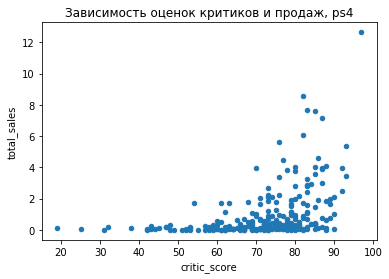

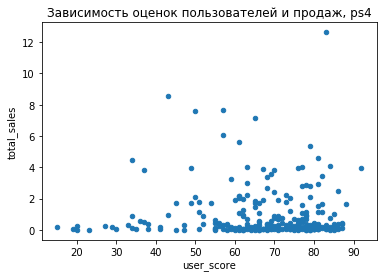

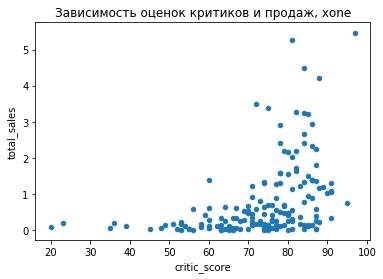

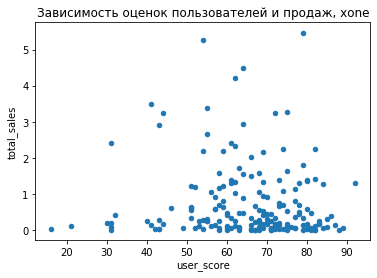

In [73]:
for platform, games_on_platform in games_profit_platforms.groupby('platform'):  
    #print(platform)
    games_on_platform.plot(kind='scatter', x='critic_score', y='total_sales',title = 'Зависимость оценок критиков и продаж, {}'.format(platform))
    games_on_platform.plot(kind='scatter', x='user_score', y='total_sales', title = 'Зависимость оценок пользователей и продаж, {}'.format(platform))

- Как мы видим, в обоих случаях корреляция продаж с оценками **пользователей** гораздо более **слабая**, нежели с оценками **критиков**;
- При рейтинге критиков от **60 баллов и выше** наблюдается заметный рост продаж игр на обоих платформах;
- Б**о**льшая часть продаж,однако, так же приходится на игры с оценкой от пользователей от 60 баллов и выше, что неудивительно. Выше балл - привлекательней игра для покупателя.


>Так же посмотрим  на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для этого посмотрим *ящики с усами* по жанрам

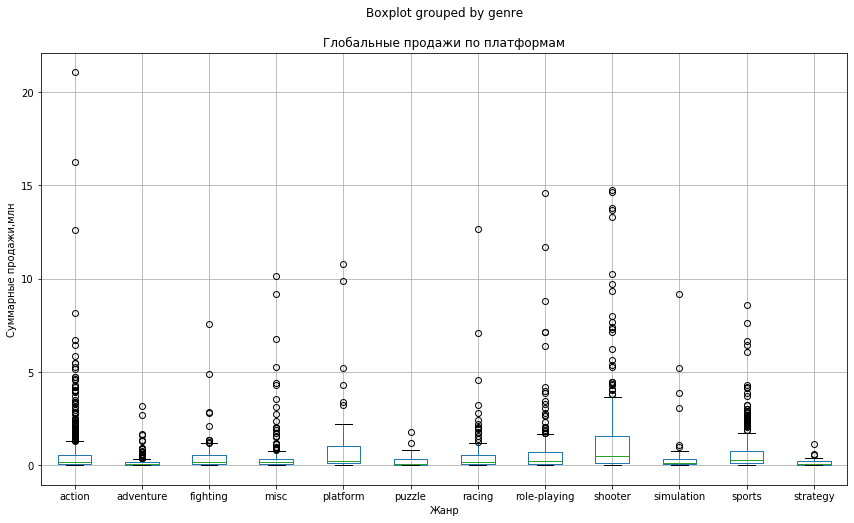

In [68]:
games_f.boxplot(column='total_sales', by='genre',figsize=(14, 8))
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи,млн')
plt.title('Глобальные продажи по платформам');

> Выводы по жанрам
- Как мы видим, очень много игр выходят в жанрах **Action,Misc,Shooter,Role-playing и Sports**,из которых только в жанре **Action** есть игры, число проданных копий которых свыше 15 миллионов;
- Самые высокие продажи делят между собой жанры **Action,Role-playing и Shooter**;
- Относительно высоким средниим выделяется среди жанров только жанр **Shooter**;
- Наименее продаваемые игры относятся к жанру **Puzzle, Strategy, Adventure**;
- Очень плохо продаются и, как следствие, редко выпускаются игры жанра **Strategy и Puzzle**;
- Игры жанра **PLatform** так же пользуются низким спросом,за редким исключением;

#### Выводы


> Общая картина взаимосвязи продаж с рейтингом от пользователей и от критиков одинакова что для частных случаев, что в общем. Однако есть нюансы.

- В прогнозировании продаж и, соответсвтенно, выручки в дальнейшем будет наиболее рационально опираться именно наоценку игры **критиками**, т.к. их мнение имеет более высокую корреляцию с последующими продажами, для чего можно использовать закрытые показы, бета-версии и предварительный или ранний доступ для блогеров с широким охватом аудитории, представителям игровой прессы;
- При рейтинге что от пользоватателей, что от критиков, отталкиваться стоит от оценки **в 60 баллов и выше** из ста для прогноирования хороших продаж;
- При более низких значениях рейтинга стоит проводить дальнейшую доработку продукта, улучшать сам продукт или повышать заинтересованность через рекламу и медиа.
- Максимальный интервал для анализа - **5 лет**, что соответствует примерной серединой срока жизни платформы, на которую планируется портировать игру;
- В быстро меняющейся индустрии, когда через 2-3 года после пика продаж актуальность платформы начинает резко падать, рекоменудется брать временной отрезок в **2-3 года**.

### Составление портрета пользователя каждого региона

#### Предпочитаемые жанры

In [52]:
games_f.genre.value_counts()

action          907
sports          311
misc            283
role-playing    267
shooter         259
adventure       169
racing          136
fighting        126
platform         96
simulation       75
strategy         44
puzzle           28
Name: genre, dtype: int64

Для начала рассмотрим продажи по жанрам для различных регионов

In [53]:
games_f.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,N/A,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,80,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,86,N/A,0.39
7,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64,68,E,0.05
8,life is strange,ps4,2016,adventure,0.15,0.15,0.03,0.06,85,86,M,0.39


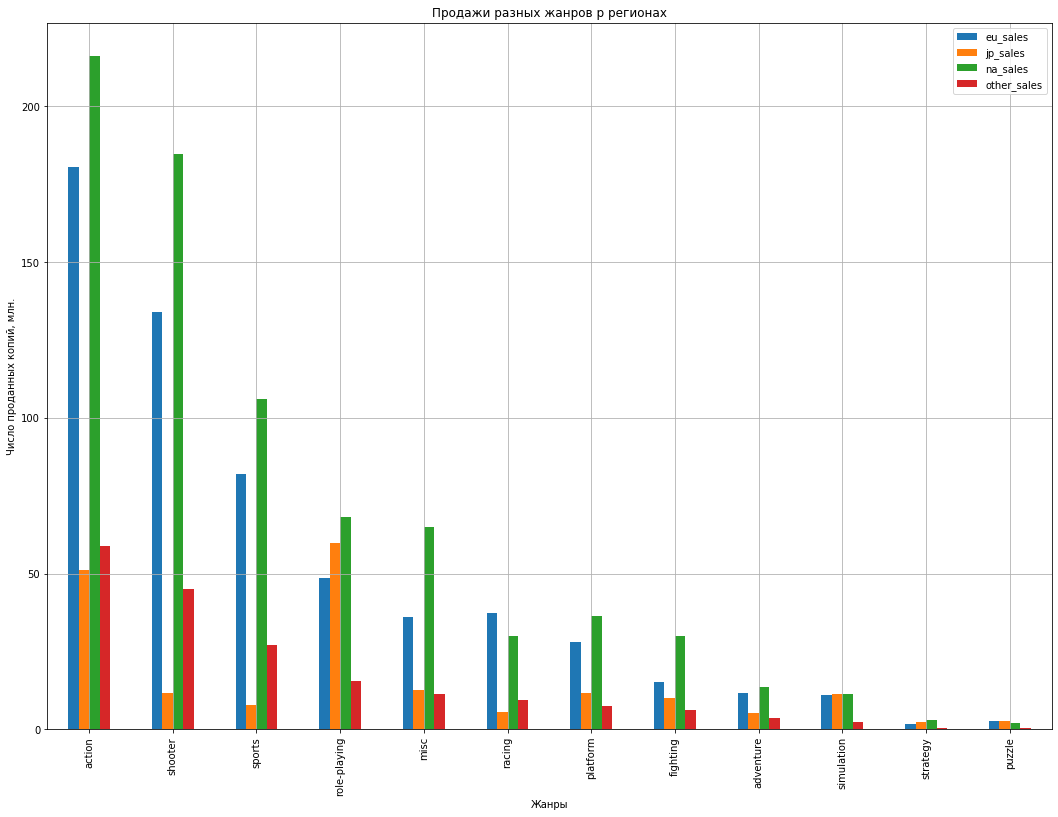

In [54]:
ax = games_f.pivot_table(index = 'genre',
                         values = ['na_sales',
                                   'eu_sales',
                                   'jp_sales',
                                   'other_sales'],
                         aggfunc = 'sum').sort_values(by='other_sales',
                                                      ascending = False).plot(kind = 'bar',
                                                                              grid = True,
                                                                              title = 'Продажи разных жанров р регионах',
                                                                              figsize = (18,13))
ax.set_xlabel('Жанры')
ax.set_ylabel('Число проданных копий, млн.');

- **Наибольшее** число проданных копий среди жанров почти во всех регионах,кроме Японии, приходится на жанр **Action и Shooter**;
- **Наименьшей** популярностью во всех регионах полльзуются игры жанров **Strategy, Puzzle и Adventure**;

Теперь рассмотрим различные регионы отдельно:

**Европейский сегмент**

- В ТОП-3 европейского сегмента идут жанры Action и Shooter, а так же спортивные игры;
- Ролевые игры,гонки, платформеры музыкальные пользуются средней популярностью;
- Наиболее непопулярные - паззлы, стратегии, симуляторы и приключения с файтингами;

**Северная Америка**

- Картина идентична Европейскому сегменту, продажи несколько выше в таких жанрах как **Action, Shooter и спортивных играх **;


**Япония**

Тут картина значительно отличается из-за менталитета:

- Наибольшим спросом пользуются жанры ролевых игр, затем Action;
- Средний спрос приходится на такие жанры как Шутеры, спортивные игры, музыкальные и платформеры;
- Наименьший спрос приходится на гонки,стратегии и паззлы;

**Остальные**

- Спрос значительно ниже всех предыдущих, по распределению идентичен Европейскому и Северноамериканскому.

>Дополнительно для будущей пользы предлагаю оценить, как менялась популярность жанров в разные года.

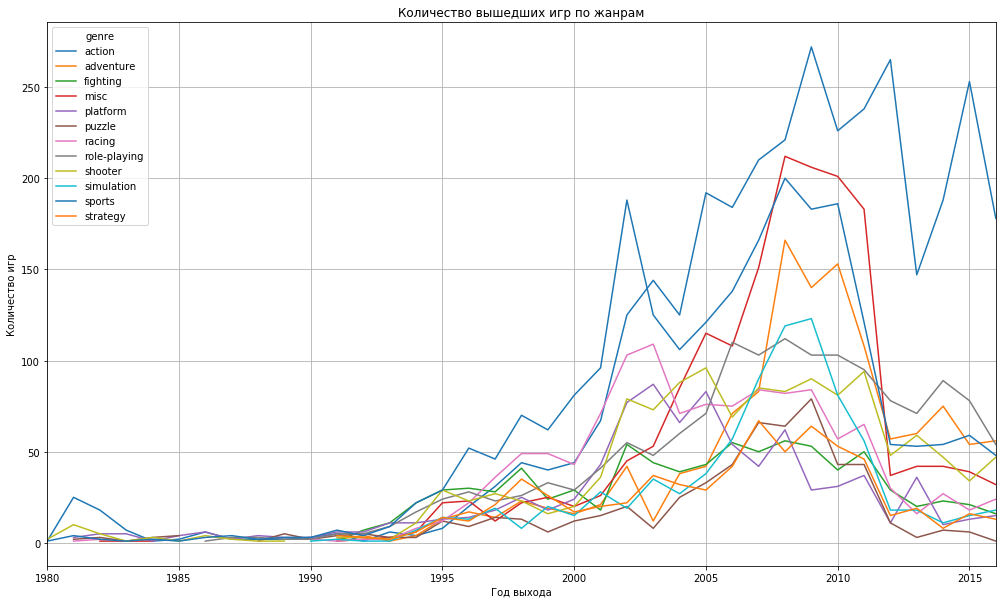

In [55]:
games_genres = games.pivot_table(index= 'year_of_release',
                                 columns='genre',
                                 values='name',
                                 aggfunc='count').plot(kind = 'line',
                                                         grid = True,
                                                         title = 'Количество вышедших игр по жанрам',
                                                         figsize = (17,10))
games_genres.set_xlabel('Год выхода')
games_genres.set_ylabel('Количество игр');

Как мы видим, со временем после **2011** года популярность всех жанров снизилась по сравнению с предыдущим периодом 2005-2010 года. 
- Во-первых,это связано с общим снижением количества выходящих игр по всем платформам, как мы видели ранее в ***п 4.14***;
- Во-вторых, мы видим хоть и скачкообразное, но высокое значение относительно других число игр жанра **Action**,который, как мы видели, как раз пользуется наибольшей популярностью в данном отрезке времени **2011-2016 года**.
- В-третьих, относительно других жанров, неплохие значение, хоть и гораздо **более низкие**,нежели игры жанра **Action** показывают игры жанров **Role-playing, Sports и Adventure**;
- Самые низкие значения приходятся **Puzzle, Strategy, Simultion** (который имел весьма неплохую популярность с 2005 по 2010 годы), **а так же Platform**.

#### Возврастной рейтинг игры 

In [56]:
games_f.rating.unique()

array(['N/A', 'M', 'E', 'T', 'E10+'], dtype=object)

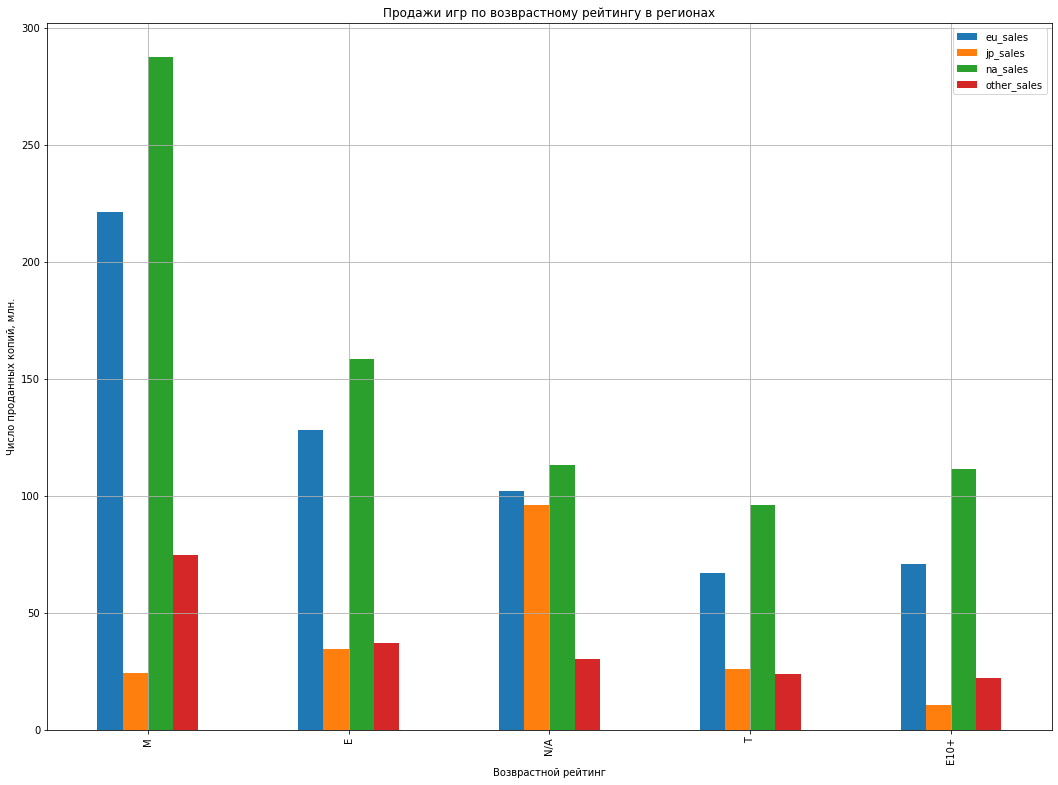

In [57]:
ax = games_f.pivot_table(index = 'rating',
                         values = ['na_sales',
                                   'eu_sales',
                                   'jp_sales',
                                   'other_sales'],
                         aggfunc = 'sum').sort_values(by='other_sales',
                                                      ascending = False).plot(kind = 'bar',
                                                                              grid = True,
                                                                              title = 'Продажи игр по возврастному рейтингу в регионах',
                                                                              figsize = (18,13))
ax.set_xlabel('Возврастной рейтинг')
ax.set_ylabel('Число проданных копий, млн.');

Говоря о возврастном рейтинге, можно сделать следующие выводы

**Европейский сегмент**

- Наиболее популярными являются игры с возврастным ограничением **«Для взрослых»**: игры,которые не подходят для подростков младше 17 лет. Это наиболее часто встречающиеся бестселлеры категории ААА с реалистичными сценами и минимумом цензуры;
- В середине списка **«E» («Everyone»)** — *«Для всех»*: cодержание таких игр вполне подходит для возрастной категории от 6 лет;
- В меньшей степени люди выбирают игры с категориями  **«T» («Teen»)** — *«Подросткам»*,которые  подходят для лиц от 13 лет и **для всех от 10+ лет**;

**Северная Америка**
- Распределение выглядит таким же образом, выше лишь уровень продаж;

**Япония**
>Здесь большой процент игр без рейтинга, помеченных как **N/A**, что объясняется тем, что в Японии выходит огромное количество игр для внутреннего рынка, которым не присваивают международный рейтинг.
- В среднем продажи для остальных возрастных групп находятся на **приблизительно одинаковом уровне**;
- Как и в ругих регионах, меньшим спросом пользуются игры с рейтингом **для всех от 10+**;

**Остальные**
- Распределение **идентично** Североамериканскому и Европейскому регионам, особых отличий кроме меньшего объёма продаж нет.

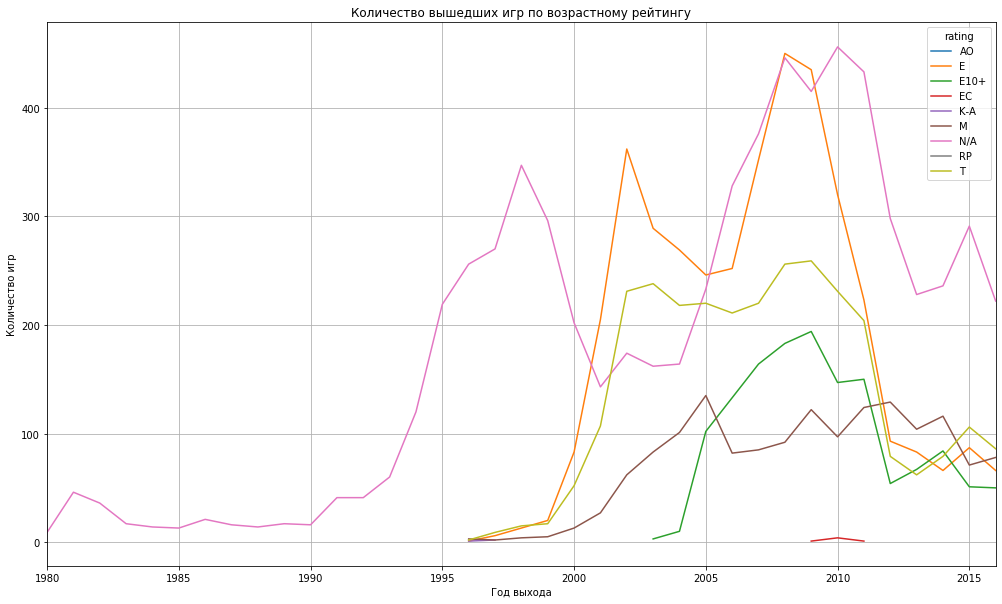

In [58]:
games_ratings = games.pivot_table(index= 'year_of_release',
                                 columns='rating',
                                 values='name',
                                 aggfunc='count').plot(kind = 'line',
                                                         grid = True,
                                                         title = 'Количество вышедших игр по возрастному рейтингу',
                                                         figsize = (17,10))
games_ratings.set_xlabel('Год выхода')
games_ratings.set_ylabel('Количество игр');

- Как мы видим, присвоение возврастоного рейтинга начинается с **1996** года;
- Самое большое количество игр выходило **без  возрастного рейтинга** - это логично, так как бОльшая часть выходило на внутреннем рынке Японии;

Теперь касаемо актуального периода,т.е. с 2011 года:

- Самое большое количество игр выходило так же **без присвоения рейтинга**;
- С **2011** года больше всего игр выходило с рейтингами **M,T и E** .

#### Платформы

In [59]:
games_f.platform.value_counts()

ps3     708
3ds     512
x360    498
ps4     392
xone    247
wii     197
wiiu    147
Name: platform, dtype: int64

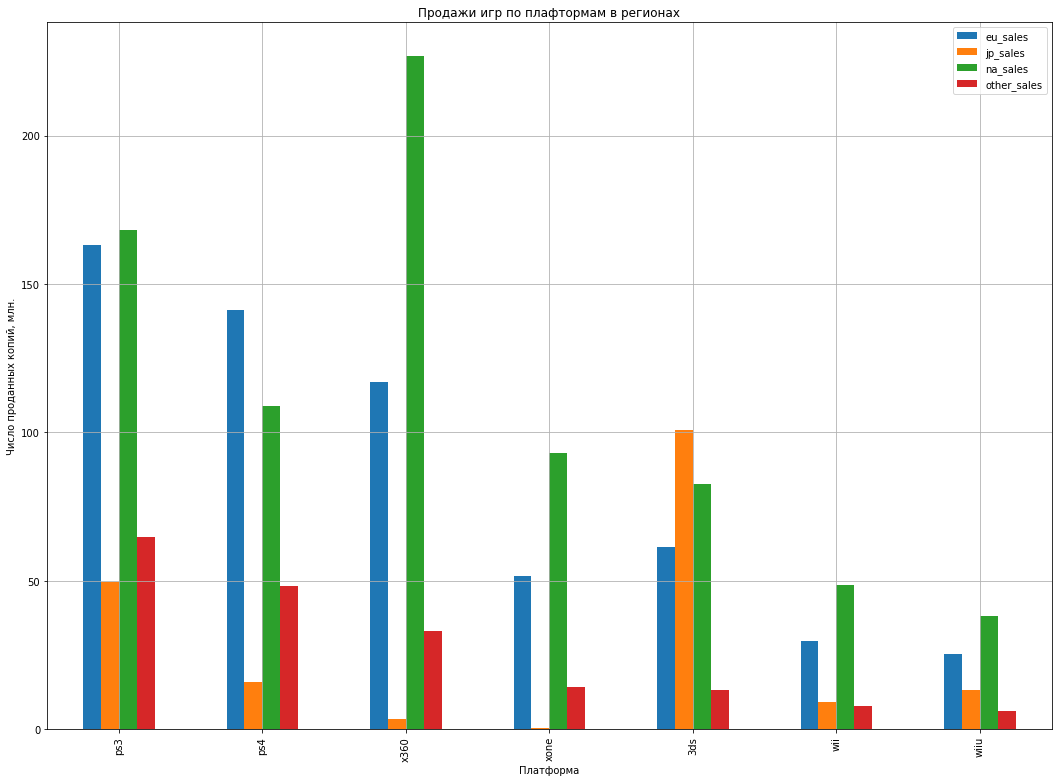

In [60]:
ax = games_f.pivot_table(index = 'platform',
                         values = ['na_sales',
                                   'eu_sales',
                                   'jp_sales',
                                   'other_sales'],
                         aggfunc = 'sum').sort_values(by='other_sales',
                                                      ascending = False).plot(kind = 'bar',
                                                                              grid = True,
                                                                              title = 'Продажи игр по плафтормам в регионах',
                                                                              figsize = (18,13))
ax.set_xlabel('Платформа')
ax.set_ylabel('Число проданных копий, млн.');

**Европа**

- В Европе **большая** часть продаж по платформам приходится на **PS3/PS4 Xbox 360**,таким образом они являются самыми **популярными** в данном регионе;
- **Наименее** популярные платформы для игры в этом регионе являются **Wii,Wiiu Xbox One**;
- **3DS** пользуется умеренной популярностью;

**Северная Америка**
- **Самой популярной** является **Xbox 360**,за ним следуют **PS3/PS4**,сильно уступая в продажах;
- **Средними** по популярности являются **Xbox One и 3DS**
- **Наименее** популярные платформы для игры в этом регионе являются **Wii,Wiiu**;

**Япония**
- **Самой популярной** является **3DS**,за ним следует **PS3**,сильно уступая в продажах;
- **Wiiu и PS4** пользуются посредственным спросом;
- На устройства от компании Майкрософт, - **Хbox 360 и Xbox One** спроса практически **нет**;

**Остальные**
- Распределение **идентично** Европейскому региону.

## Проверка гипотез

In [61]:
games_f.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,dragon quest builders: revive alefgard,ps4,2016,role-playing,0.04,0.11,0.22,0.03,NaN,NaN,N/A,0.40
2,until dawn: rush of blood,ps4,2016,adventure,0.18,0.15,0.00,0.07,72,80,M,0.40
3,dark souls iii,xone,2016,role-playing,0.26,0.09,0.00,0.04,87,86,N/A,0.39
7,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64,68,E,0.05
8,life is strange,ps4,2016,adventure,0.15,0.15,0.03,0.06,85,86,M,0.39


В данной части мы будем проверять следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC

Сформулируем нулевую и альтернативную гипотезу
- **H0**: Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**
- **H1**: Средние пользовательские рейтинги платформ Xbox One и PC **различаются**

In [62]:
xbox = games_f.loc[games_f.platform == 'xone']
pc = games.loc[games.platform == 'pc']

# Требуется также отбросить Nan для проверки гипотезы. На простой расчёт средних в numpy это бы не отразилось,
# Однако модуль scipy не может обработать такие данные
xbox_rating = xbox['user_score'].dropna()
pc_rating = (pc['user_score']*10).dropna()

In [63]:
display('Среднее значение рейтинга игр на Xbox One:',xbox_rating.mean())
display('Среднее значение рейтинга игр на PC:',pc_rating.mean())

'Среднее значение рейтинга игр на Xbox One:'

65.21428571428571

'Среднее значение рейтинга игр на PC:'

70.6596

Прямым подсчётом видим, что средние значения рейтинга отличаются на 15 баллов. Проверим гипотезу.

In [64]:

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    xbox_rating, 
    pc_rating)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.3038124513469725e-05
Отвергаем нулевую гипотезу


>Таким образом, мы можем **подтвердить**, что cредние пользовательские рейтинги платформ Xbox One и PC **различаются**.

### Средние пользовательские рейтинги жанров Action и Sports 

Тут нам надо удостовериться, что средние рейтинги жанров отличаются друг от друга, сформулируем гипотезы


- **H0**: Средние пользовательские рейтинги жанров Action и Sports **одинаковые**
- **H1**: Средние пользовательские рейтинги жанров Action и Sports **различаются**

Для начала отберём и отсортируем эти данные для проверки

In [65]:
action = games_f.loc[games_f.genre == 'action']['user_score'].dropna()
sports = games_f.loc[games_f.genre == 'sports']['user_score'].dropna()

In [66]:
display('Среднее значение рейтинга игр жанра Action:',action.mean())
display('Среднее значение рейтинга игр жанра Sports:',sports.mean())

'Среднее значение рейтинга игр жанра Action:'

67.50561797752809

'Среднее значение рейтинга игр жанра Sports:'

56.37440758293839

In [67]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    action, 
    sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.6413400885601442e-20
Отвергаем нулевую гипотезу


> Мы получили довольно высокое p-value, которое значительно выше уровня статистической значимости. Таким образом, мы можем сказать, что отвергаем нулевую гипотезу о равенстве средних для рейтинга жанров Action и Sports. **Средние пользовательские рейтинги рейтинги жанров Action и Sports различаются**.

## Общие выводы

>**Платформы**
- Средний срок платформы составляет приблизительно **8-10 лет**;
- Лучше ориентироваться на максимальный срок **в 5** лет до момента предполагаемого выхода игры,и исследовать данные в этом диапазоне. В нём сразу будет видно, какие процессы происходят с продажами на данной платформе;
- Самые популярные платформы для портирования c 2011 года - **Xboх One,Xboх 360,3DS, PS3/PS4, Wii и WiiU**

>**Жанры**
- Самые продаваемые жанры -  **Action, Role-playing, Sports и Adventure**;
- Самыми непопулярными жанрами являются **Puzzle, Strategy, Simultion и Platform**;

> **Возрастной рейтинг**
- Самой большой группой по популярности является сегмент с возрастным рейтингом **M и без рейтинга**;
- За ним следуют игры с рейтингом **Е и Е10+**;

> **Проверка гипотез**

1) **Средние пользовательские рейтинги жанров Action и Sports**
- Средние пользовательские рейтинги рейтинги жанров Action и Sports **различаются**;
- Средний пользовательский рейтинг жанра **Action**: **67.5** по выборке;
- Средней пользовательский рейтинг жанра **Sports**: **56.4** по выборке.

2) **Средние пользовательские рейтинги платформ Xbox One и PC**
- Средние пользовательские рейтинги платформ Xbox One и PC **различаются**;
- Среднее значение рейтинга игр на **PC**: **70.7** по выборке;
- Среднее значение рейтинга игр на **Xbox One**: **65.2** по выборке.